In [1]:
%load_ext autoreload
%autoreload 2

from ryn.common import helper
helper.notebook()

changing directory


In [2]:
from ryn.graphs import split
from ryn.graphs import loader

g = loader.load_graphs_from_uri('oke.fb15k237-trainvalidtest')[0]
print(f'loaded {g.str_stats}')

rels = split.Relation.from_graph(g)
rels.sort(key=lambda rel: rel.ratio)
print(f'retrieved {len(rels)} relations')

loaded ryn graph: oke.fb15k237-trainvalidtest
  nodes: 14541
  edges: 310116 (237 types)
  degree:
    mean 42.65
    median 26

retrieved 237 relations


In [3]:
from tabulate import tabulate

rows = [(i, r.r, r.ratio, len(r.hs), len(r.ts), r.name) for i, r in enumerate(rels, 1)]

N = 20

print(f'first {N}')
print(tabulate(rows[:N]))

print(f'mid {N}')
m = len(rows) / 2
print(tabulate(rows[int(m-N/2):int(m+N/2)]))

print(f'last {N}')
print(tabulate(rows[-N:]))

first 20
--  ---  -----------  ----  ---  --------------------------------------------------------------------------------------------------------------
 1   25  0.000229148  4364    1  /common/topic/webpage./common/webpage/category
 2   43  0.000441501  4530    2  /people/person/gender
 3  120  0.0010352     966    1  /location/hud_foreclosure_area/estimated_number_of_mortgages./measurement_unit/dated_integer/source
 4   85  0.00119976   3334    4  /people/person/spouse_s./people/marriage/type_of_union
 5  118  0.0020284     493    1  /user/tsegaran/random/taxonomy_subject/entry./user/tsegaran/random/taxonomy_entry/taxonomy
 6   33  0.00218341    458    1  /location/statistical_region/rent50_2./measurement_unit/dated_money_value/currency
 7   11  0.00307503   1626    5  /film/film/release_date_s./film/film_regional_release_date/film_release_distribution_medium
 8  110  0.0037594     266    1  /tv/tv_producer/programs_produced./tv/tv_producer_term/producer_type
 9   34  0.00475867   14

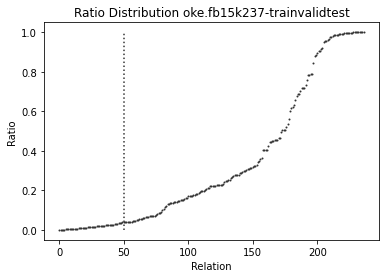

In [10]:
import ryn
from ryn.common import plotter

path = ryn.ENV.SPLIT_DIR / f'{g.name}.ratio'
path.parent.mkdir(exist_ok=True, parents=True)

plt = plotter.Plotter(title=f'Ratio Distribution {g.name}', xlabel='Relation', ylabel='Ratio', fname=str(path))
plt.ax.scatter(range(len(rels)), [r.ratio for r in rels], color=plotter.CLR[0], s=1)
plt.ax.vlines(50, 0, 1, color=plotter.CLR[0], linestyle='dotted')

print()
plt.plot()
print()

In [ ]:
import ryn

for i in range(5, 6):
    for seed in seeds:

        cfg = split.Config(
            seed=seed,
            ow_split=0.5,
            train_split=0.7,
            threshold=i * 10)
        
        print(f'config: {cfg}')
        split.create(g, cfg)
        print('done')


In [ ]:
path = pathlib.Path('data') / 'split' / 'oke.fb15k237_0.50-0.70_50_30061990'
# split.analyse(path)
dataset = split.Dataset.load(path)
print(dataset)